### Feature Selection 기법

##### Recursive Feature Elimination 
* feature 중요도가 낮은 속성들을 차례로 제거해 가면서 반복적으로 학습/평가를 수행하여 최적 feature 추출
* 수행시간이 오래 걸리고, 낮은 속성들을 제거해 나가는 메커니즘이 정확한 Feature Selection을 찾는 목표에 정확히 부합하지 않을 수 있음

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


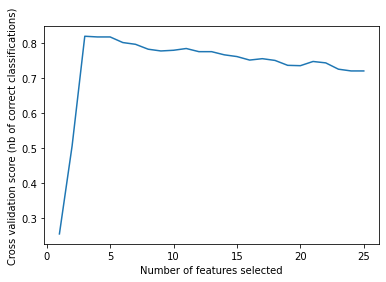

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

# 분류를 위한 Feautre 개수가 25개인 데이터 1000개 생성
# 임의로 샘플링하는 것
X, y = make_classification(n_samples = 1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# SVC classifier 선택, 조금 더 빠름
svc = SVC(kernel = 'linear')

# REFCV로 feature들을 반복적으로 제거해가면서 학습/평가 수행
# step이 만약 2이면 25 -> 23 -> 21 이런식으로의 step을 말한다.
# 순차적으로 feature를 선택한 것을 보여주기 위해서는 verbose = 2
# verbose = 학습 중 출력되는 문구를 설정합니다.
# - 0 : 아무 것도 출력하지 않습니다.
# - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
# - 2 : 미니 배치마다 손실 정보를 출력합니다.
# 데이터셋이 크고 lightgvm에 돌리면 한참 걸리게 된다.    
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
             scoring='accuracy', verbose = 2)
rfecv.fit(X,y)

print('Optimal number of feautres : %d' % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)
plt.show()

In [3]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


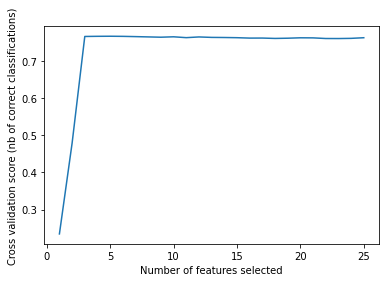

In [4]:
# SVC classifier 선택
svc = SVC(kernel="linear")
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행.  
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

##### SelectFromModel

In [5]:
# 당뇨병 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes =load_diabetes()
X,y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

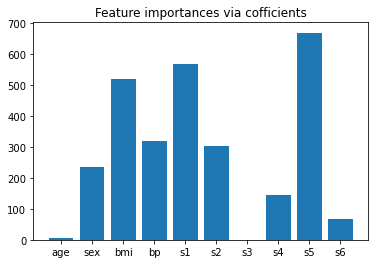

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X,y)
# 회귀계수는 -1로 가까워도 영향력이 크고 1로 가까워도 영향력이 크므로 절댓값을 씌워서 할 수 있다.
importance = np.abs(lasso.coef_) 
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title('Feature importances via cofficients')
plt.show()


In [8]:
from sklearn.feature_selection import SelectFromModel
from time import time

# sort는 오름차순으로 낮은거가 위로 가니깐 -3은 가장 높은 것 3개를 의미한다.
# + 0.01을 하면 상위에 있던 bmi는 나오지않는다.
threshold = np.sort(importance)[-3] + 0.01
print('threshold:', threshold)

# bmi를 제외하고 출력하려면 threshold = threshold로 진행이 가능하다.
# 곱하기는 str안에 있어도 계산이 가능하다.
# threshold를 이용해서 위에서부터 아래서부터 이런식으로 importance를 사용해서 찾아낼 수 있다.
sfm = SelectFromModel(lasso, threshold = '1.5 * median').fit(X,y)
print('Features selected by SelectFromModel:' f'{feature_names[sfm.get_support()]}')

threshold: 521.7485426067491
Features selected by SelectFromModel:['bmi' 's1' 's5']


#### Permutation Importance
https://scikit-learn.org/stable/modules/permutation_importance.html

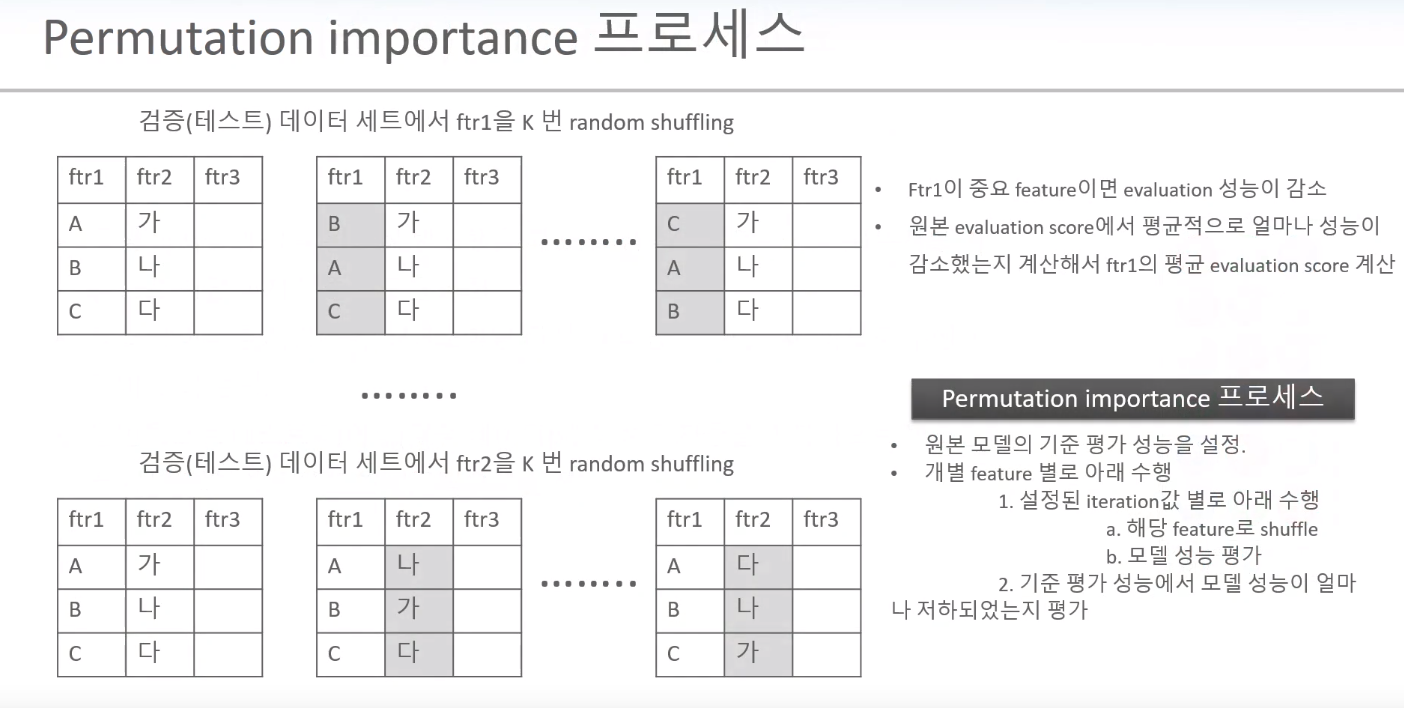

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

#학습, 예측, R2 Score 평가 
model = Ridge(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_val)
print('r2 score:', r2_score(y_val, y_pred))

r2 score: 0.35666062386954533


In [18]:
from sklearn.inspection import permutation_importance

# 학습데이터로는 검증데이터를 넣어준다. 테스트 데이터를 넣으면 overfitting
r = permutation_importance(model, X_val, y_val, n_repeats = 30, random_state = 0)

# 가장 평균 permutation importance가 높은 순으로 내림 차순 정렬 후 평균 permutation importance값과 표준 편차 출력
# argsort()[::-1]: : 높은 순으로 내림 차순 정렬
# i는 인자값을 가진다.
# r.importances_std : 표준편차
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(diabetes.feature_names[i], "  ", np.round(r.importances_mean[i], 4), '+/-', np.round(r.importances_std[i],5))
# feature importance는 tree기반의 gini와 같이 정보를 쪼개것에 대한 중요성
# 모델에 대해서 중요도와 관련은 있지만 완벽한 기준이 될 수 없기에 permutation importance를 사용한다.


s5    0.2042 +/- 0.04965
bmi    0.1758 +/- 0.0484
bp    0.0884 +/- 0.03284
sex    0.0559 +/- 0.02319


In [19]:
r.importances_mean

array([-0.00199267,  0.05587407,  0.17579   ,  0.08836513,  0.04221134,
        0.00203626,  0.00203754,  0.00318695,  0.20423412,  0.00278683])

#### Permutation Importance vs Random Forest Feature Importance
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

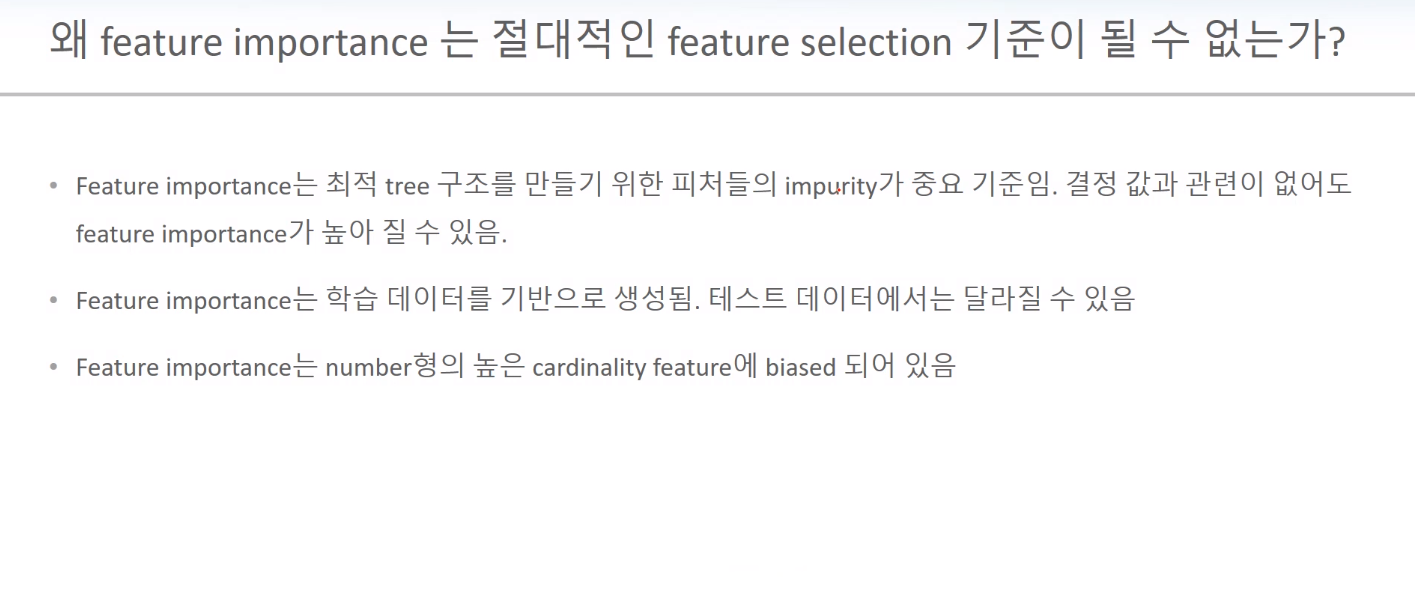

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [26]:
# titanic 데이터 세트 로딩. 
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)


rng = np.random.RandomState(seed=42)
# 컬럼을 2개를 추가하기, 2개의 컬럼은 그냥 노이즈값으로 어떻게 importance를 측정하는지 확인하기 위함
# 3가지 값으로 category값 random 설정. 
X['random_cat'] = rng.randint(3, size=X.shape[0])
# X건수만큼 고유한 random 값 설정. 
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['pclass', 'sex', 'embarked', 'random_cat']
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'random_num']

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# Null 값 처리, category 값 encoding 
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

# 데이터 전처리 후 RandomForest로 학습 
rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'par

In [27]:
print('RF train accuracy: %0.3f' % rf.score(X_train, y_train))
print('RF test accuracy: %0.3f' % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.817


<ipython-input-28-41f1e3c4a6b7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


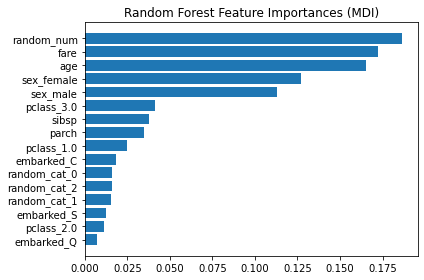

In [28]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

##### 검증 데이터 세트로 permutation importance 수행

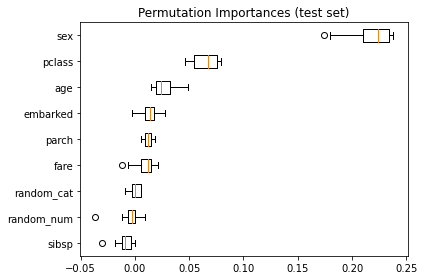

In [29]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()